In [2]:
%store -r df_compl df y_target_compl
y_target_compl["loan_status_str"].value_counts()

Fully Paid     33133
Charged Off     5634
current         3765
Name: loan_status_str, dtype: int64

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car', 'wedding', 'medical',
       'moving', 'house', 'educational', 'vacation', 'renewable_energy'],
      dtype='object')

In [4]:
plx.histogram(y_target_compl, "loan_status",)

In [5]:
y_target_compl["loan_status"].value_counts()

Fully Paid                                             33133
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

In [6]:
plx.histogram(df_compl, "purpose", color = y_target_compl["loan_status_str"], category_orders={"purpose" : df_compl["purpose"].value_counts().index})

<AxesSubplot:xlabel='loan_status_int', ylabel='purpose'>

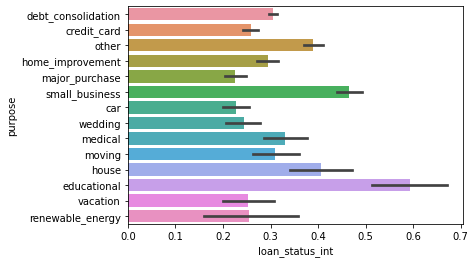

In [7]:
sns.barplot(y=df_compl["purpose"], x=y_target_compl["loan_status_int"], data=df_compl, order = df_compl["purpose"].value_counts().index)

In [8]:
pd.pivot_table(df_compl, "purpose", y_target_compl["loan_status_int"], df_compl["purpose"], aggfunc="count")

purpose           car  credit_card  debt_consolidation  educational  \
loan_status_int                                                       
0                1352         4499               15372          269   
1                 160          543                2772           56   
2                 103          435                1631           97   

purpose          home_improvement  house  major_purchase  medical  moving  \
loan_status_int                                                             
0                            2553    310            1939      576     486   
1                             347     59             222      106      92   
2                             297     57             150       71      51   

purpose          other  renewable_energy  small_business  vacation  wedding  
loan_status_int                                                              
0                 3247                83            1290       323      834  
1                  633                19             476        53       96  
2                  545                 4             226        24       74

In [9]:
plx.histogram(df_compl, "issue_d", color = y_target_compl["loan_status_str"])

<AxesSubplot:xlabel='loan_status_int', ylabel='issue_d'>

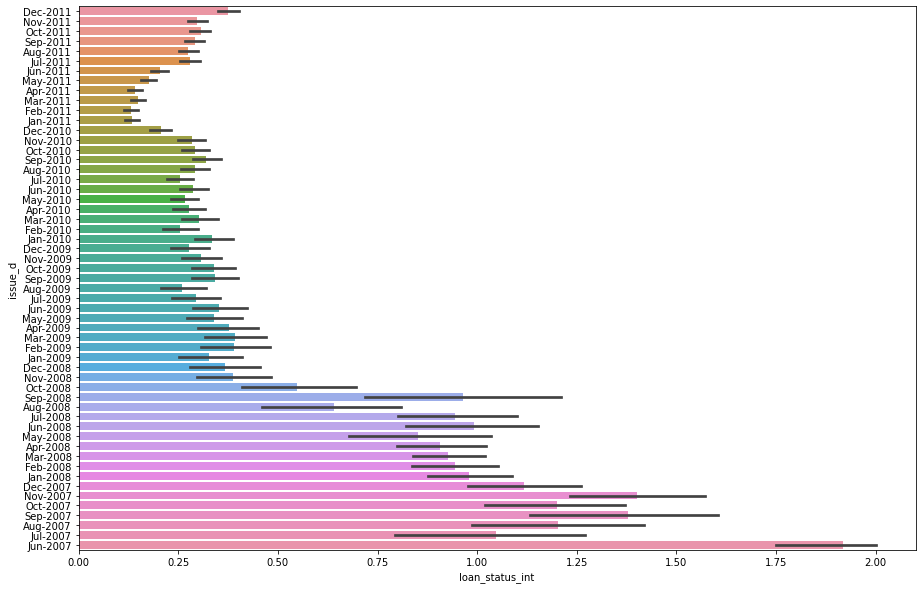

In [10]:
fig = plt.figure(figsize=(15,10))
sns.barplot(y=df_compl["issue_d"], x=y_target_compl["loan_status_int"], data=df_compl)

In [11]:
plx.histogram(df_compl, "home_ownership", color = y_target_compl["loan_status_str"])

<AxesSubplot:xlabel='loan_status_int', ylabel='home_ownership'>

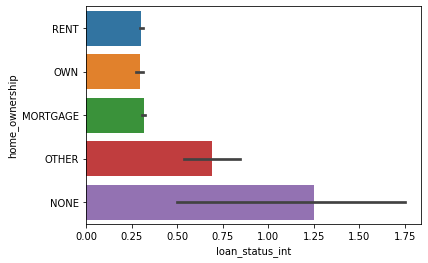

In [12]:
sns.barplot(y=df_compl["home_ownership"], x=y_target_compl["loan_status_int"], data=df_compl)

In [13]:
plx.histogram(df_compl, "int_rate", color = y_target_compl["loan_status_str"])

<AxesSubplot:xlabel='loan_status_int', ylabel='int_rate'>

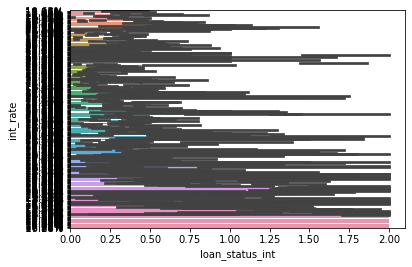

In [14]:
sns.barplot(y=df_compl["int_rate"], x=y_target_compl["loan_status_int"], data=df_compl)

In [38]:
plx.histogram(df_compl, "loan_amnt", color = y_target_compl["loan_status_str"])

<AxesSubplot:xlabel='loan_status_int', ylabel='loan_amnt'>

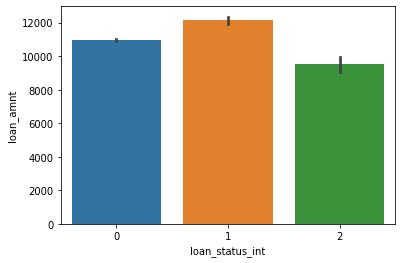

In [18]:
sns.barplot(y=df_compl["loan_amnt"], x=y_target_compl["loan_status_int"], data=df_compl)

In [39]:
plx.histogram(df_compl, "annual_inc", color = y_target_compl["loan_status_str"])

<AxesSubplot:xlabel='loan_status_int', ylabel='annual_inc'>

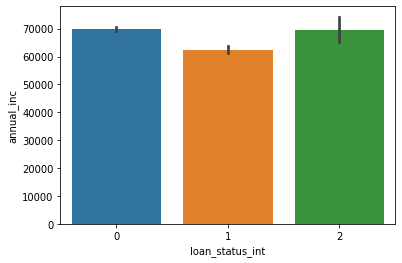

In [19]:
sns.barplot(y=df_compl["annual_inc"], x=y_target_compl["loan_status_int"], data=df_compl)

In [40]:
plx.histogram(df_compl, "grade", color = y_target_compl["loan_status_str"], category_orders={"grade" : ["A","B","C","D","E","F","G"]})

<AxesSubplot:xlabel='loan_status_int', ylabel='grade'>

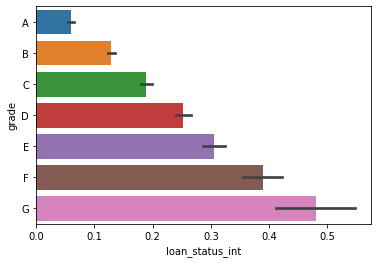

In [23]:
sns.barplot(y=df_compl["grade"], x=y_target_compl["loan_status_int"], data=df_compl, order = ["A","B","C","D","E","F","G"])

In [41]:
pd.pivot_table(df_compl, "grade", y_target_compl["loan_status_str"], df_compl["grade"], aggfunc="count")

grade               A      B     C     D     E    F    G
loan_status_str                                         
Charged Off       602   1433  1354  1128   721  321  102
Fully Paid       9573  10870  7236  4691  2515  887  338
current             8     85   148   197   158   93   72

In [49]:
table_absolute = pd.pivot_table(df_compl, "grade", y_target_compl["loan_status_str"], df_compl["grade"], aggfunc="count")
table_percentage = table_absolute.copy()
for col in table_absolute:
    for i in y_target_compl["loan_status_str"].value_counts().index:
        table_percentage.loc[i,col] = table_absolute.loc[i,col] / table_absolute[col].sum()
print(table_percentage)

grade                   A         B         C         D         E         F  \
loan_status_str                                                               
Charged Off      0.059118  0.115676  0.154955  0.187500  0.212434  0.246733   
Fully Paid       0.940096  0.877462  0.828107  0.779754  0.741014  0.681783   
current          0.000786  0.006861  0.016938  0.032746  0.046553  0.071483   

grade                   G  
loan_status_str            
Charged Off      0.199219  
Fully Paid       0.660156  
current          0.140625  


In [34]:
df.groupby([y_target_compl["grade"], y_target_compl["loan_status_str"]]).mean()

loan_amnt       term   int_rate  installment  \
grade loan_status_str                                                    
A     Charged Off       7799.916944  37.475083   7.595997   231.609518   
      Fully Paid        8651.378878  37.005327   7.325976   257.588254   
      current           5112.500000  36.000000   8.305000   160.695000   
B     Charged Off      10911.217725  43.503140  11.121605   300.367146   
      Fully Paid       11088.042778  41.011960  11.002100   322.450707   
      current           8046.764706  37.694118  10.756706   254.205765   
C     Charged Off      11097.267356  45.039882  13.599970   309.652984   
      Fully Paid       10856.198176  42.235489  13.499605   319.524225   
      current           9656.925676  37.297297  12.611554   310.909054   
D     Charged Off      12234.729610  47.659574  15.847952   345.751011   
      Fully Paid       11904.423364  44.144958  15.558073   359.441181   
      current           8310.913706  39.289340  14.480812   267.354822   
E     Charged Off      15917.094313  54.141470  17.861845   421.895340   
      Fully Paid       14765.039761  50.400000  17.353841   407.843821   
      current           8187.816456  41.924051  15.528165   252.629367   
F     Charged Off      19289.563863  55.813084  19.994517   523.158474   
      Fully Paid       16775.507328  52.369786  19.220417   466.605423   
      current          13345.698925  40.645161  17.176452   434.766237   
G     Charged Off      18704.166667  55.058824  21.486373   539.805098   
      Fully Paid       17512.278107  49.988166  20.478846   516.851686   
      current          12834.027778  40.666667  18.855278   420.842500   

                         annual_inc        issue_d        dti   open_acc  \
grade loan_status_str                                                      
A     Charged Off      52510.369385  734125.408638  13.346761   9.078073   
      Fully Paid       67643.001837  734093.438734  11.962776   9.452996   
      current          42587.000000  733273.375000  10.560000   9.000000   
B     Charged Off      59603.123573  734085.119330  13.838542   9.161200   
      Fully Paid       68631.003923  734069.851058  13.349369   9.187552   
      current          71402.806118  733494.011765  11.602000   9.952381   
C     Charged Off      58738.156832  734054.263663  14.424069   9.016987   
      Fully Paid       68763.682384  733999.847015  13.754606   9.221024   
      current          72478.851351  733500.790541  13.236216   9.412162   
D     Charged Off      62376.468741  734082.981383  14.021879   9.132979   
      Fully Paid       69775.834724  734003.673844  13.954133   9.197186   
      current          65898.524061  733577.751269  14.080051   9.632653   
E     Charged Off      73369.732982  734153.811373  14.166685   9.162275   
      Fully Paid       77602.202700  734012.810338  14.144541   9.744232   
      current          60179.835949  733426.924051  14.711456   9.512658   
F     Charged Off      80406.913988  734184.903427  14.009938   9.660436   
      Fully Paid       84927.062029  734028.121759  14.686979  10.496054   
      current          74443.725806  733390.516129  16.386989  10.698925   
G     Charged Off      79566.692451  734167.421569  13.898725  11.235294   
      Fully Paid       98136.240473  733867.431953  15.827959  11.275148   
      current          88315.652778  733358.402778  17.552778  12.541667   

                          revol_bal  pub_rec_bankruptcies  
grade loan_status_str                                      
A     Charged Off      11762.662791              0.014950  
      Fully Paid       11799.588112              0.012535  
      current          24159.125000              0.000000  
B     Charged Off      12702.073971              0.049546  
      Fully Paid       14174.868169              0.043514  
      current          35534.858824              0.035294  
C     Charged Off      13418.502216              0.074594  
      Fully Paid       14427.48438